<a href="https://colab.research.google.com/github/jovanrajic/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_t_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Data Science Unit 1 Sprint 2 Module 1*

# T-tests (Inferential Statistics)

## Learning Objectives
- Student can explain the purpose of and be able to identify opportunities and applications for t-tests
- Student can set up and run a one-sample t test on a sample
- Student can set up and run a two-sample t test comparing two samples
- Studen can use a p-value to draw the correct conclusion about the null and alternative hypothesis and give a written conclusion

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [2]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

a   b
0  1   2
1  2   4
2  3   6
3  4   8
4  5  10

In [3]:
# How can we quickly look at some descriptive statistics of the above dataframe?

df.describe()

a          b
count  5.000000   5.000000
mean   3.000000   6.000000
std    1.581139   3.162278
min    1.000000   2.000000
25%    2.000000   4.000000
50%    3.000000   6.000000
75%    4.000000   8.000000
max    5.000000  10.000000

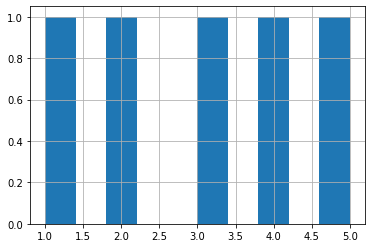

In [5]:
df["a"].hist();

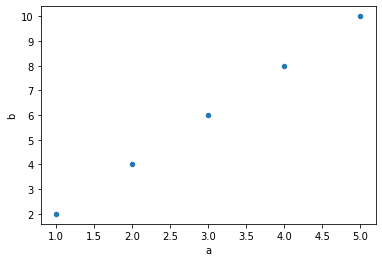

In [6]:
df.plot.scatter("a", "b")

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Coinflips example - What is the population?

coinflips = np.random.binomial(n=1, p=.5, size= 100)

coinflips

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [15]:
df = pd.DataFrame({"coinflips": coinflips})

df.head()

coinflips
0          0
1          0
2          1
3          0
4          0

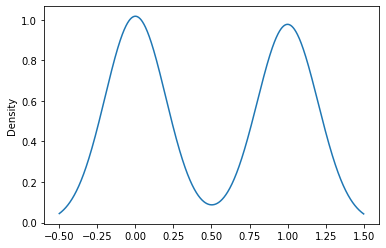

In [16]:
df["coinflips"].plot.density()
plt.show()

In [55]:
coinflips = np.random.binomial(n=1, p=.5, size = 100)

print(coinflips)

coinflips.mean()

[1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0]


0.46

In [25]:
coinflips.mean()

0.47

If we repeat the sampling why does our estimate of the mean move around so much? 

In [74]:
# Coinflips example - See the implications of randomness
coinflips = np.random.binomial(n=1, p=.5, size = 1000)

print(coinflips)

coinflips.mean()

[1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 

0.505

What happens as I increase the sample size? The sample mean deviates less from the...?

In [83]:
# More Information -> Greater Confidence in the face of randomness

coinflips = np.random.binomial(n=1, p=.5, size = 2000)

print(coinflips)

coinflips.mean()

[0 0 0 ... 1 0 0]


0.503

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

## The T-test Process:

In [85]:
from scipy import stats

In [97]:
# Lets use a tool called a t-test to test if this is a fair coin or not
# Coinflips example - See the implications of randomness
coinflips = np.random.binomial(n=1, p=.6, size = 200)

coinflips

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0])

In [98]:
stats.ttest_1samp(coinflips, .5 )

Ttest_1sampResult(statistic=2.4335679803580983, pvalue=0.01583385562354738)

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

### Null Hypothesis:

The average cooking times on the two burners are different:

$H_0:  \overline(x)_1 == \overline(x)_2$

In [131]:
xbar1 = 180
s1 = 5

xbar2 = 178.5
s2= 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, 178.5, 800)

In [132]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=1.4793329698424895, pvalue=0.13922651999397173)

In [ ]:
# Let's do it!


In [133]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-08-10 17:49:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-08-10 17:49:33 (483 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [135]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv("house-votes-84.data", names = column_headers)

print(df.shape)
df.head()

(435, 17)


party handicapped-infants water-project  ... crime duty-free south-africa
0  republican                   n             y  ...     y         n            y
1  republican                   n             y  ...     y         n            ?
2    democrat                   ?             y  ...     y         n            n
3    democrat                   n             y  ...     n         n            y
4    democrat                   y             y  ...     y         y            y

[5 rows x 17 columns]

In [137]:
df= df.replace ({"y": 1, 'n': 0, "?": np.NaN})

df.head()

party  handicapped-infants  ...  duty-free  south-africa
0  republican                  0.0  ...        0.0           1.0
1  republican                  0.0  ...        0.0           NaN
2    democrat                  NaN  ...        0.0           0.0
3    democrat                  0.0  ...        0.0           1.0
4    democrat                  1.0  ...        1.0           1.0

[5 rows x 17 columns]

In [138]:
df.describe()

handicapped-infants  water-project  ...   duty-free  south-africa
count           423.000000     387.000000  ...  407.000000    331.000000
mean              0.442080       0.503876  ...    0.427518      0.812689
std               0.497222       0.500632  ...    0.495327      0.390752
min               0.000000       0.000000  ...    0.000000      0.000000
25%               0.000000       0.000000  ...    0.000000      1.000000
50%               0.000000       1.000000  ...    0.000000      1.000000
75%               1.000000       1.000000  ...    1.000000      1.000000
max               1.000000       1.000000  ...    1.000000      1.000000

[8 rows x 16 columns]

In [160]:
# take sample from this population
# pull rows at random from the dataset
sample = df.sample(20, random_state=42)

sample.head()

party  handicapped-infants  ...  duty-free  south-africa
280    democrat                  0.0  ...        0.0           1.0
78     democrat                  1.0  ...        0.0           1.0
113  republican                  0.0  ...        0.0           0.0
253  republican                  0.0  ...        0.0           1.0
324  republican                  0.0  ...        0.0           0.0

[5 rows x 17 columns]

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means